In [1]:
from DataDifficulty import *
from matplotlib import pyplot as plt
from pprint import pprint

In [2]:
X = np.load('X.npy')
y = np.load('y.npy')

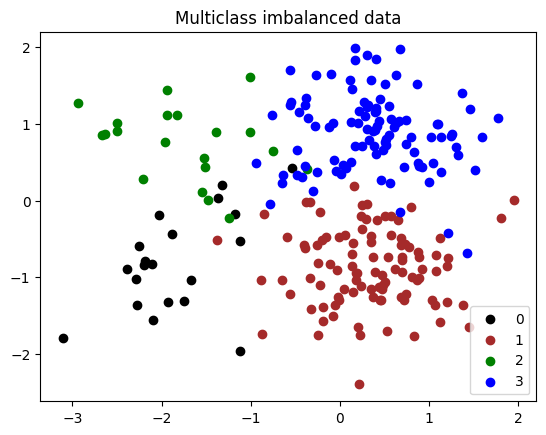

In [109]:
plt.scatter(X[:,0][y==0], X[:,1][y==0], c='black', label=0)
plt.scatter(X[:,0][y==1], X[:,1][y==1], c='brown', label=1)
plt.scatter(X[:,0][y==2], X[:,1][y==2], c='green', label=2)
plt.scatter(X[:,0][y==3], X[:,1][y==3], c='blue', label=3)
plt.title('Multiclass imbalanced data')
plt.legend()
plt.show()

In [4]:
MINORITY_CLASSES = [0, 2]

For quick, tune-free summary report run this method:

(In general user can omit `classes` parameter, and any method will automatically detect minority classes. Despite of that ability, it is encouraged to explicitly pass minority classes as list of labels, because since the definition of *minority* and *majority* class may vary between any project, thus the automatic minority class detection views the class with maximal cardinality among all the classes as *majority* class, and any class of cardinality smaller than the cardinality of majority class as *minority* class.)

Start computing imbalance ratios...
Imbalance ratios: 
class 0 : 5.0
class 1 : 1.0
class 2 : 5.0
class 3 : 1.0
Start data difficulty study...
KNN based method


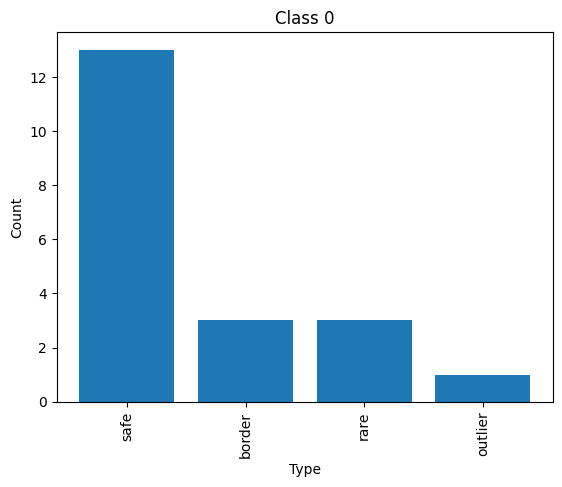

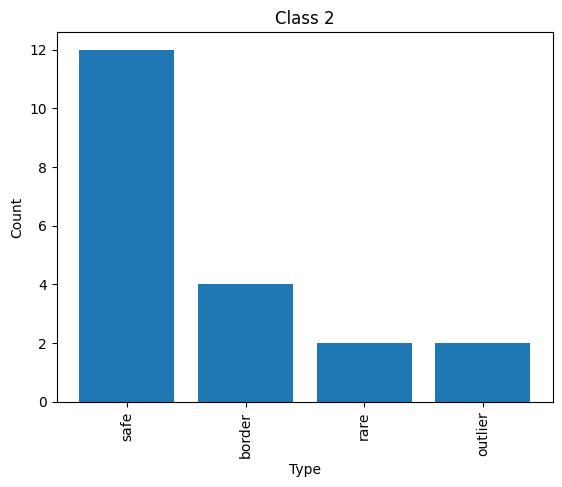

Kernel density function based method


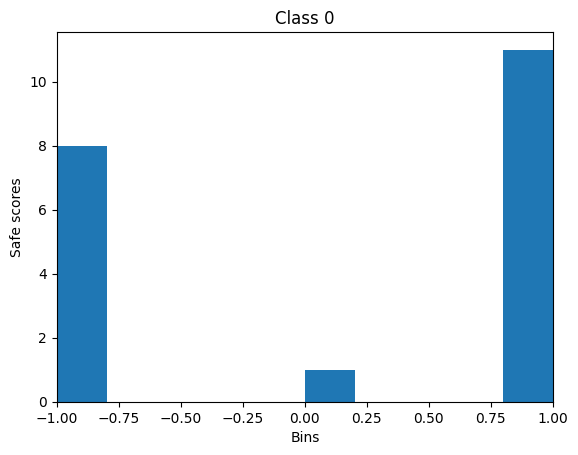

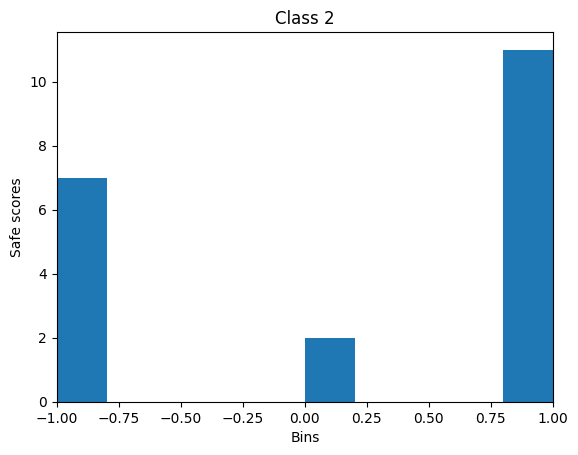

Continuous data difficulty


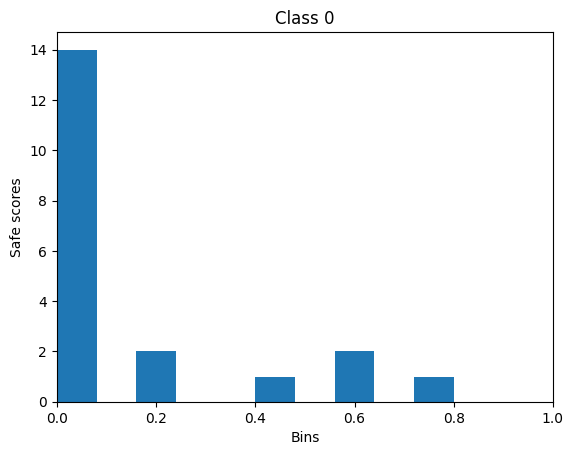

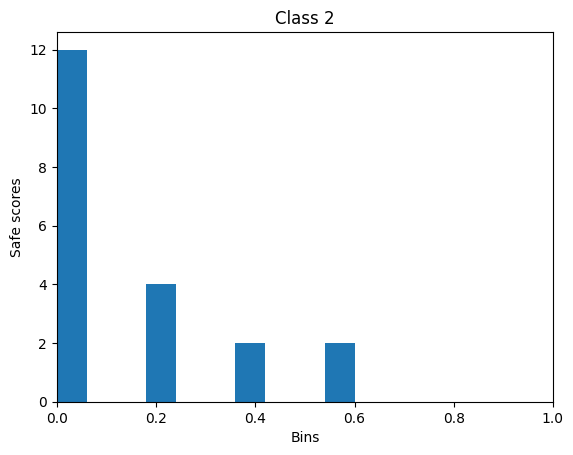

Class neighboring study...


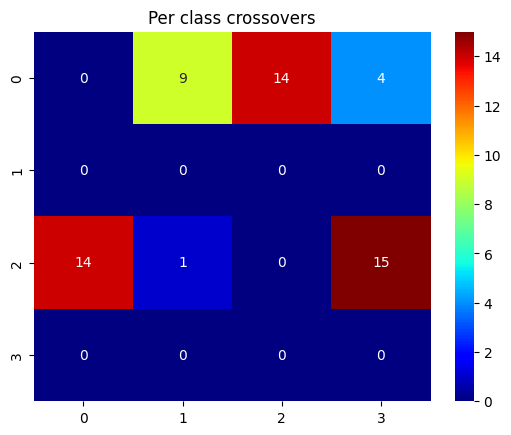

Class homogeneity study...
KMeans Elbow


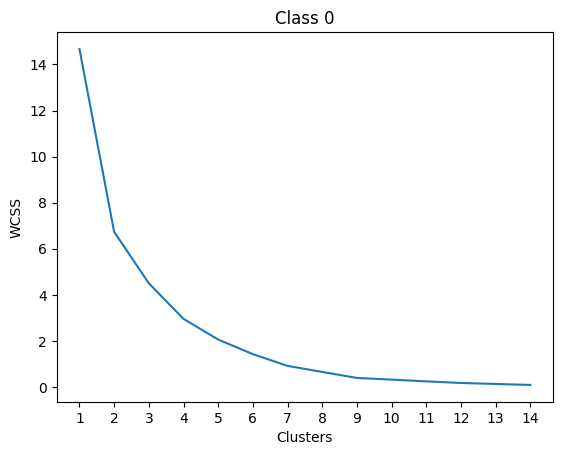

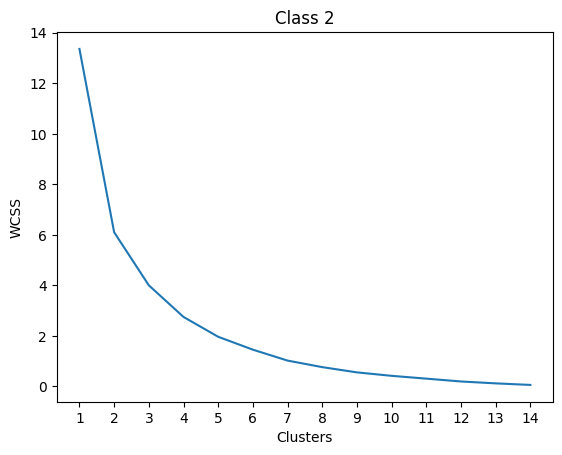

Gaussian mixture Elbow


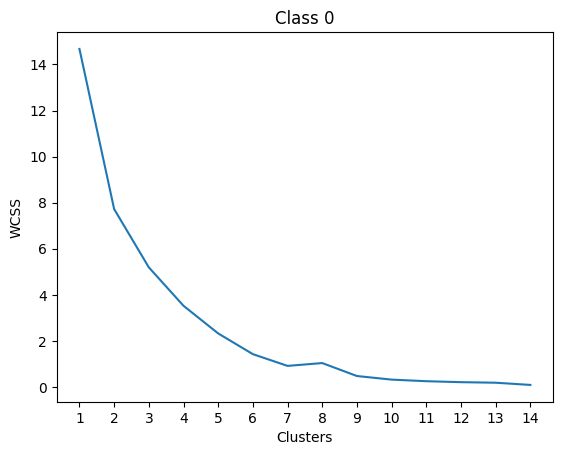

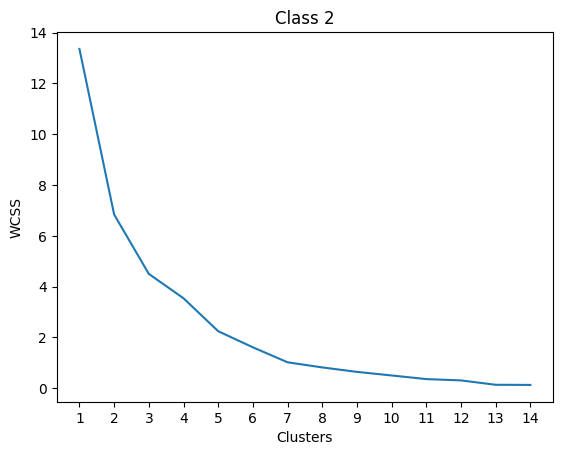

In [5]:
summary = Summary()
summary.fit(X=X, y=y, classes=MINORITY_CLASSES)

Now, let's break down these figures...

The report starts with imbalance ratios. It is the most common and basic metric to gain some insight into your imbalanced dataset. We define it as $IR=\frac{C_{maj}}{C_{min}}$, which is a ratio between a given class' cardinality and the cardinality of the largest class in the dataset. You can see imbalance ratios for each class using our library. Let's see how to use this method separately from the summary:

In [6]:
ir_object = ImbalanceRatio()
ir_results = ir_object.fit(y)
pprint(ir_results)

{0: 5.0, 1: 1.0, 2: 5.0, 3: 1.0}


We get a dictionary in the form of {class label : imbalance ratio}. As you can see we use `.fit()` method to use our method. Running `.fit()` is the way to use any of `DataDifficulty` methods, and most of them (apart form imbalance ratio, since we usually care about seeing the results quite accurately, which is hard to do on a plot) also come equipped with `.fit_plot()` method, which dresses up the results of `.fit()` with some nice plots.

Next we want to study the data difficulty. The standard algorithm tells us what level of difficulty each minority class data point has. You can learn about this method here: 
<span style="font-family: 'Times New Roman';">
Doe, J., & Smith, J. (2021). <i>Title of the article</i>. <b>Title of the Journal</b>, <i>Volume</i>(Issue), Page(s). <a href="https://example.com/article">https://example.com/article</a>
</span>

It can be run as any other of our algorithms:


In [7]:
knn_dd_object = KNNDataDifficulty(classes=MINORITY_CLASSES)
knn_dd_results = knn_dd_object.fit(X=X, y=y)
pprint(knn_dd_results)

{0: {'border': 3, 'outlier': 1, 'rare': 3, 'safe': 13},
 2: {'border': 4, 'outlier': 2, 'rare': 2, 'safe': 12}}


Thus we get intuitively structured output, in form of {class label : {each difficulty level : count(examples of that difficulty level in that minority class)}}. Each `DataDifficulty` function has a comprehensive documentation with clear type hinting. If you feel like you are lost on what kind of object is returned, please see the docs.

As mentioned, we can easily yield the output in form of a appropriate figure:

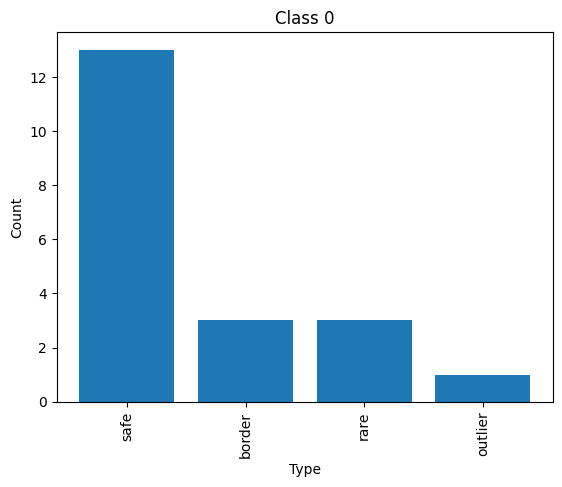

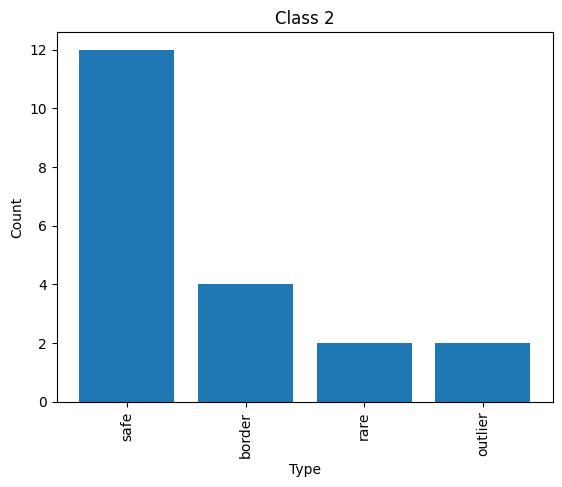

In [8]:
knn_dd_object.fit_plot(X=X, y=y);

Next is data difficulty study using some kernel functions. The KNN methods fix the number of neighbors and work on any distance between those neighbors. Kernel methods work on limited distances (kernel bandwidth), but the number of neighbors is unlimited, thus these two methods can yield different results.
<span style="font-family: 'Times New Roman';">
Doe, J., & Smith, J. (2021). <i>Title of the article</i>. <b>Title of the Journal</b>, <i>Volume</i>(Issue), Page(s). <a href="https://example.com/article">https://example.com/article</a>
</span>

Let's run it:


In [9]:
kernel_dd_object = KernelDataDifficulty(classes=MINORITY_CLASSES)
kernel_dd_results = kernel_dd_object.fit(X, y)
pprint(kernel_dd_results)

{0: [-1.0,
     -1.0,
     -1.0,
     1.0,
     -1.0,
     1.0,
     1.0,
     1.0,
     -1.0,
     -1.0,
     1.0,
     1.0,
     1.0,
     -1.0,
     0.152557441,
     1.0,
     1.0,
     1.0,
     -1.0,
     1.0],
 2: [1.0,
     1.0,
     -1.0,
     -1.0,
     1.0,
     1.0,
     1.0,
     1.0,
     -1.0,
     0.1548038477,
     1.0,
     1.0,
     -1.0,
     0.0,
     -1.0,
     1.0,
     -1.0,
     -1.0,
     1.0,
     1.0]}


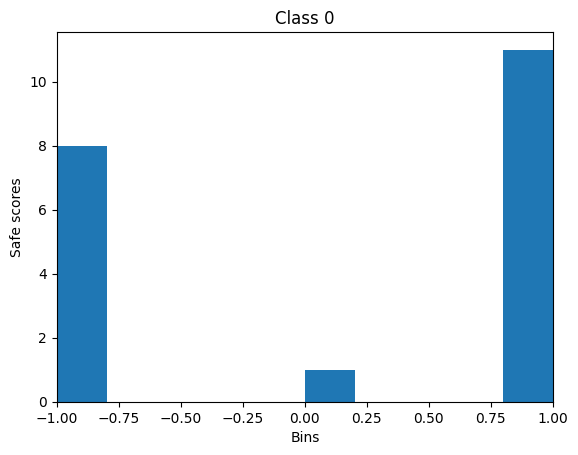

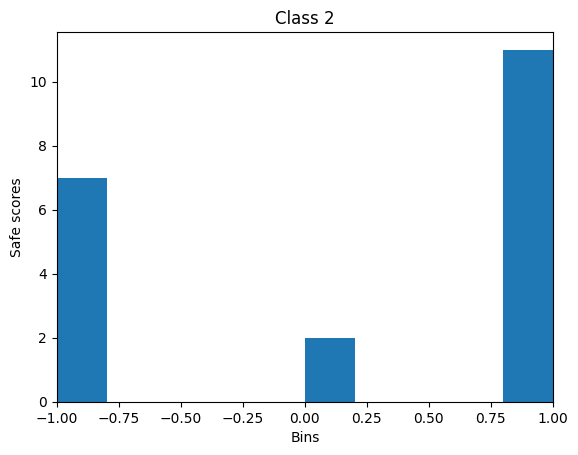

In [10]:
kernel_dd_object.fit_plot(X, y);

This way we get exact values. The `-1`s model the situation, in which there is not enough information about an example (no neighbors within kernel bandwidth). With each method which gives results which are not aggregated as counts per class, but present as many values as class cardinality, you can associate specific examples with specific scores by simply iterating through the class:

In [11]:
pprint(list(zip(X[y==0], kernel_dd_results[0])))

[(array([-3.10873789, -1.79098605]), -1.0),
 (array([-2.09539738, -1.55185262]), -1.0),
 (array([-1.88315385, -0.44047762]), -1.0),
 (array([-2.10445912, -0.82603466]), 1.0),
 (array([-2.27784105, -1.35958317]), -1.0),
 (array([-2.25140702, -0.59726922]), 1.0),
 (array([-2.1997694 , -0.84379434]), 1.0),
 (array([-1.17917902, -0.17073185]), 1.0),
 (array([-1.12564811, -1.95863255]), -1.0),
 (array([-1.67149983, -1.04075384]), -1.0),
 (array([-2.18413609, -0.79040705]), 1.0),
 (array([-1.74509052, -1.30933388]), 1.0),
 (array([-2.29027883, -1.02594977]), 1.0),
 (array([-1.11579742, -0.52673203]), -1.0),
 (array([-0.53536383,  0.41987972]), 0.152557441),
 (array([-1.32662679,  0.20863229]), 1.0),
 (array([-1.92655868, -1.32777362]), 1.0),
 (array([-2.38803229, -0.89640488]), 1.0),
 (array([-2.03370024, -0.19446392]), -1.0),
 (array([-1.36988334,  0.03679337]), 1.0)]


To get results comparable to KNN method (safety levels instead of safety scores) run this code:

In [12]:
pprint(kernel_dd_object.fit_label_difficulty(X, y))

{0: ['not enough info',
     'not enough info',
     'not enough info',
     'safe',
     'not enough info',
     'safe',
     'safe',
     'safe',
     'not enough info',
     'not enough info',
     'safe',
     'safe',
     'safe',
     'not enough info',
     'rare',
     'safe',
     'safe',
     'safe',
     'not enough info',
     'safe'],
 2: ['safe',
     'safe',
     'not enough info',
     'not enough info',
     'safe',
     'safe',
     'safe',
     'safe',
     'not enough info',
     'rare',
     'safe',
     'safe',
     'not enough info',
     'zero',
     'not enough info',
     'safe',
     'not enough info',
     'not enough info',
     'safe',
     'safe']}


`KernelDifficulty` is parametric. We use kernel bandwidth auto tuning (as specified in the article), which automatically sets kernel bandwidth, consequently yielding results comparable to according `KNNDifficulty` method run. User may override this procedure and set custom kernel bandwidth to any value they wish to have. Here is a use case, in which we set kernel bandwidth to `1.`:

In [44]:
custom_kernel_bandwidth_dd_object = KernelDataDifficulty(classes=MINORITY_CLASSES)
custom_kernel_bandwidth_dd_results = custom_kernel_bandwidth_dd_object.fit(X=X, 
                                                                           y=y, 
                                                                           kernel_bandwidth_override=1.)

In [14]:
print('Are the results equal?: ', kernel_dd_results == custom_kernel_bandwidth_dd_results)
print('Auto tuned kernel bandwidth: ', kernel_dd_object.kernel_bandwidth)
print('Unitary kernel bandwidth: ', custom_kernel_bandwidth_dd_object.kernel_bandwidth)

Are the results different? : False
Auto tuned kernel bandwidth:  0.5235553242694769
Unitary kernel bandwidth:  1.0


User can also set different kernel functions. The default kernel function is *Epanechnikov* (quadratic). If you wish to model distances in a different manner, we also provide *uniform* (linear), and *Uniform* (constant) kernel functions:

In [25]:
triangular_dd_object = KernelDataDifficulty(classes=MINORITY_CLASSES, kernel_type='triangular')
triangular_dd_results = triangular_dd_object.fit(X, y)
uniform_dd_object = KernelDataDifficulty(classes=MINORITY_CLASSES, kernel_type='uniform')
uniform_dd_results = uniform_dd_object.fit(X, y)
print('Are the results equal?: ', kernel_dd_results == triangular_dd_results == uniform_dd_results)
pprint(f'{kernel_dd_object.kernel_object}, {triangular_dd_object.kernel_object}, {uniform_dd_object.kernel_object}')

Are the results different?:  False
('<DataDifficulty.EpanechnikovKernelFunction object at 0x7fea85dd8a30>, '
 '<DataDifficulty.TriangularKernelFuntion object at 0x7fea851579a0>, '
 '<DataDifficulty.UniformKernelFunction object at 0x7fea84cc7af0>')


Now let's take a look at similar method, with more accurate, numerical output. For reference see <span style="font-family: 'Times New Roman';">
Doe, J., & Smith, J. (2021). <i>Title of the article</i>. <b>Title of the Journal</b>, <i>Volume</i>(Issue), Page(s). <a href="https://example.com/article">https://example.com/article</a>
</span> This method is particularly interesting if you want to weigh cross-class relations.

In [45]:
cdd_object = ContinuousDataDifficulty(classes=MINORITY_CLASSES)
cdd_results = cdd_object.fit(X, y)

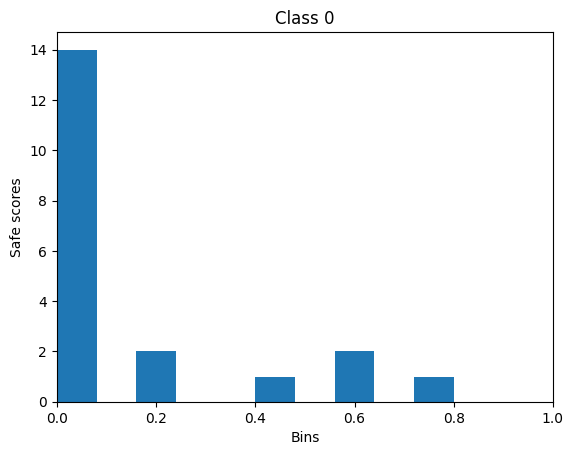

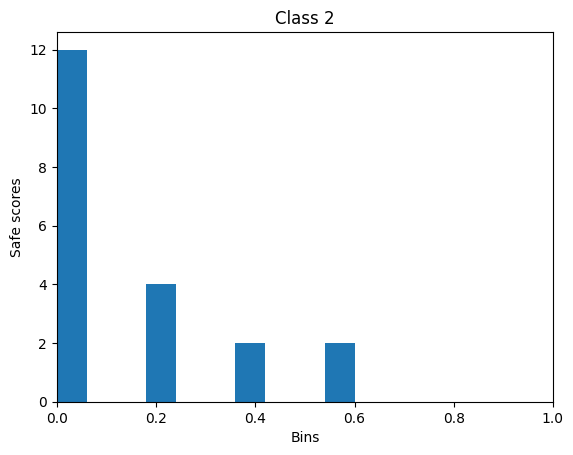

In [47]:
cdd_object.fit_plot(X, y);

This figures are histograms of scores returned by `.fit()`. As per source article the similarity matrix by default consists of `1`s where two minority classes cross over, and `0`s elsewhere. In our case minority classes are 0th and 2nd class:

In [49]:
pprint(cdd_object.similarities)

array([[0, 0, 1, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 0]])


User can alter this matrix any way you see fit:

In [55]:
custom_sim_cdd_object = ContinuousDataDifficulty(classes=MINORITY_CLASSES)
from copy import deepcopy
custom_similarity_matrix = deepcopy(cdd_object.similarities)
custom_similarity_matrix[0,1] = 42
custom_sim_cdd_results = custom_sim_cdd_object.fit(X=X, y=y, similarities=custom_similarity_matrix)
pprint(custom_sim_cdd_object.similarities)
print('Are the results equal?: ', cdd_results == custom_sim_cdd_results)

array([[ 0, 42,  1,  0],
       [ 0,  0,  0,  0],
       [ 1,  0,  0,  0],
       [ 0,  0,  0,  0]])
Are the results different?:  False


User also can change `k` parameter of underlying KNN to change the number of neighbors, and effectively broaden the area of neighborhood. Default `k` value is set to `5` in all of the `DataDifficulty` methods (see the articles to learn why). Here is how to change `k` (to `2` for example):

In [56]:
small_neighborhood_cdd_object = ContinuousDataDifficulty(classes=MINORITY_CLASSES, k=2)
small_neighborhood_cdd_results = small_neighborhood_cdd_object.fit(X, y)
print('Are the results equal?: ', cdd_results == small_neighborhood_cdd_results)

Are the results equal?:  False


Now let's examine which class pairs cross over. For each data point in each minority class we count neighbors, which aren't sampled from the same class. Here is how to do it:

In [40]:
bcm_object = BorderClassMatrix(classes=MINORITY_CLASSES)
bcm_results = bcm_object.fit(X, y)
pprint(bcm_results)

array([[ 0,  9, 14,  4],
       [ 0,  0,  0,  0],
       [14,  1,  0, 15],
       [ 0,  0,  0,  0]])


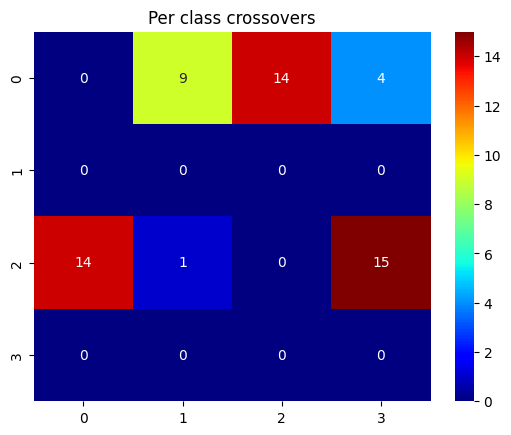

In [57]:
bcm_object.fit_plot(X, y);

We can see that for example some data point from 2nd class has one neighbor from 1st class. We can easily spot that data point (the brown one below *HERE* sign):

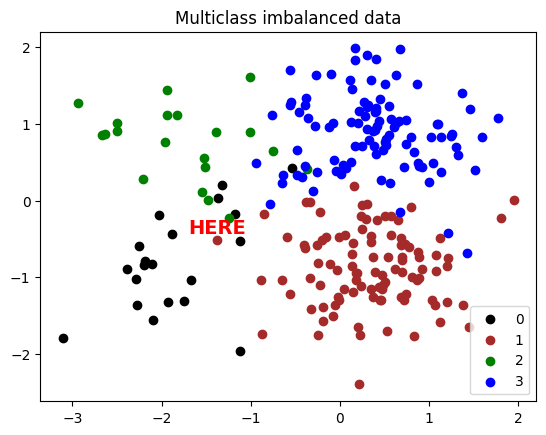

In [116]:
plt.scatter(X[:,0][y==0], X[:,1][y==0], c='black', label=0)
plt.scatter(X[:,0][y==1], X[:,1][y==1], c='brown', label=1)
plt.scatter(X[:,0][y==2], X[:,1][y==2], c='green', label=2)
plt.scatter(X[:,0][y==3], X[:,1][y==3], c='blue', label=3)
guilty_one = X[123]
plt.annotate("HERE", guilty_one, textcoords="offset points", 
             xytext=(0,5), ha='center', color='red', fontsize=14, 
             fontweight='bold', zorder=10)
plt.title('Multiclass imbalanced data')
plt.legend()
plt.show()

Lastly we may want to study per class heterogeneity of class topology. We can use elbow method in which we plot *within-cluster sum of squares* for different cluster numbers, and we try to spot 'an elbow'. This is how we do it:

In [119]:
kmeans_elbow_object = KMeansElbowMethod(classes=MINORITY_CLASSES, 
                                        cluster_count_selection=list(range(1, 15)))
kmeans_elbow_results = kmeans_elbow_object.fit(X, y)
pprint(kmeans_elbow_results)

{0: [(1, 14.67433759914556),
     (2, 6.735191559662801),
     (3, 4.501045361129617),
     (4, 2.9559490881411032),
     (5, 2.056692415453553),
     (6, 1.423381724352783),
     (7, 0.9135289469974753),
     (8, 0.6509614470348347),
     (9, 0.39022761236569303),
     (10, 0.3068780393881096),
     (11, 0.2415013633602744),
     (12, 0.17205108240314598),
     (13, 0.13045760397570533),
     (14, 0.08733458980264484)],
 2: [(1, 13.360902221513912),
     (2, 6.103153728096089),
     (3, 4.002256029006579),
     (4, 2.7871823772018507),
     (5, 1.9987013967907636),
     (6, 1.4796849273289463),
     (7, 1.0188670579543735),
     (8, 0.7630348029639596),
     (9, 0.5547676903419655),
     (10, 0.40975833799885175),
     (11, 0.2953471437139862),
     (12, 0.19485111300561064),
     (13, 0.12014881580463331),
     (14, 0.05857295979315155)]}


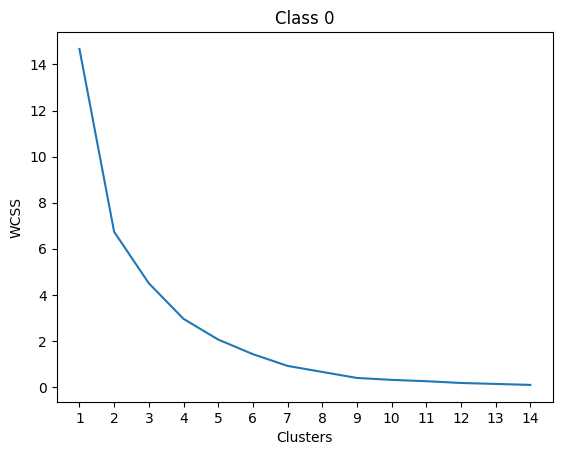

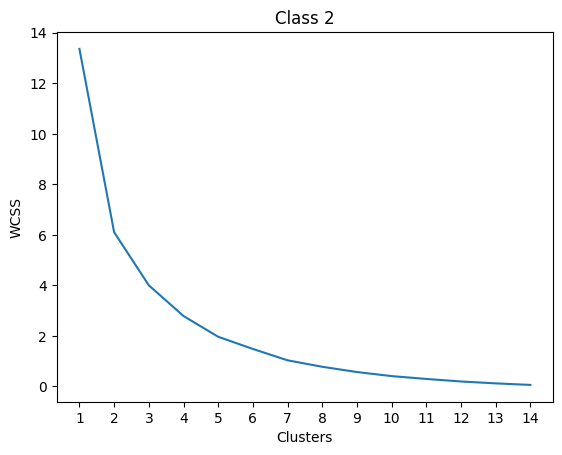

In [120]:
kmeans_elbow_object.fit_plot(X, y);

We can see smooth, descending series on the plot, which usually indicates that a class topology is homogenous. Let's try to alter the topology of our dataset. Let's forget which class is majority and which is minority, and let's create dataset in which one class is homogenous and the second class consists of 3 easily separable clusters:

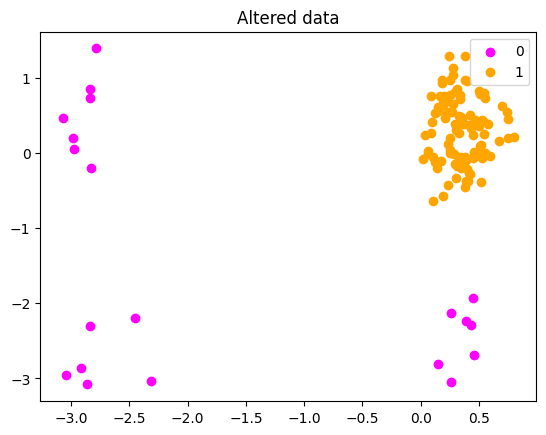

In [130]:
X = np.load('X_altered.npy')
y = np.load('y_altered.npy')
plt.scatter(X[:,0][y==0], X[:,1][y==0], c='magenta', label=0)
plt.scatter(X[:,0][y==1], X[:,1][y==1], c='orange', label=1)
plt.title('Altered data')
plt.legend()
plt.show()

Now let's rerun our method. Here is how:

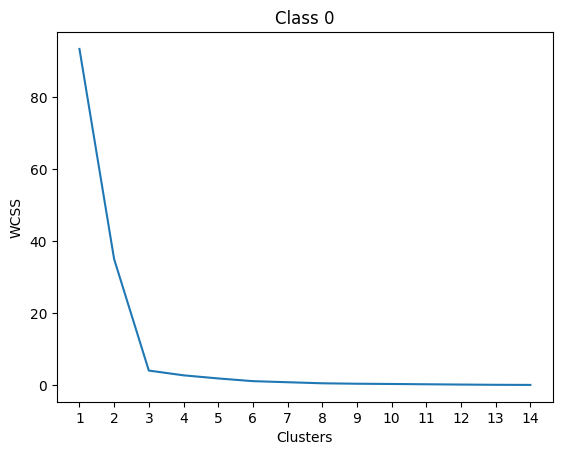

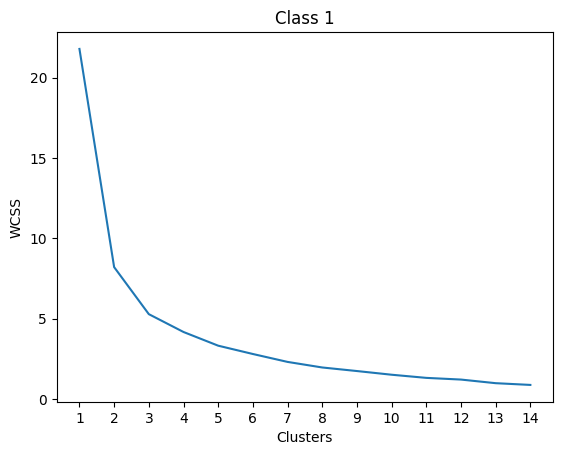

In [137]:
kmeans_elbow_object = KMeansElbowMethod(classes=[0, 1], 
                                        cluster_count_selection=list(range(1, 15)))
kmeans_elbow_results = kmeans_elbow_object.fit_plot(X, y)

We can see the elbow point right at 3 clusters in class 0th.
We can also change the search space `cluster_count_selection` and use different underlying clustering method, such as `GaussianMixture`:

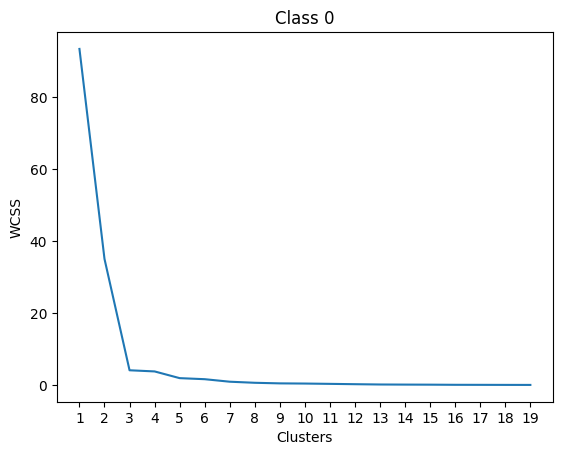

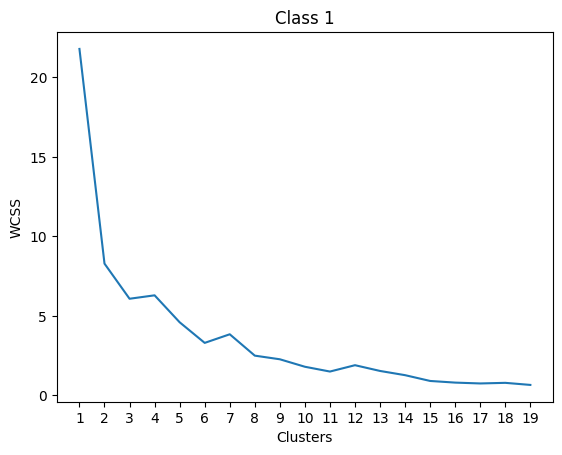

In [140]:
ge_object = GaussianMixtureElbowMethod(classes=[0, 1], 
                                       cluster_count_selection=list(range(1, 20)))
ge_results = ge_object.fit_plot(X, y)